In [1]:
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib to plot graphs and visualize data.
import numpy as np               # Import numpy for numerical operations and array manipulations.
import tensorflow as tf          # Import TensorFlow, a deep learning and machine learning library.
import pandas as pd              # Import pandas for data manipulation and analysis, particularly for structured data operations.
import seaborn as sns            # Import seaborn for data visualization, based on matplotlib but provides a higher-level interface.
import pickle                    # Import pickle module for serializing and de-serializing Python object structures.
import random                    # Import random module to generate random numbers and perform random operations.

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:  # Open the file train.p in binary read mode ('rb') from the specified directory.
    train = pickle.load(training_data)  # Deserialize the data from training_data file using pickle.load() and store it in the variable 'train'.

with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:  # Open the file valid.p in binary read mode ('rb') from the specified directory.
    valid = pickle.load(validation_data)  # Deserialize the data from validation_data file using pickle.load() and store it in the variable 'valid'.

with open("./traffic-signs-data/test.p", mode='rb') as testing_data:  # Open the file test.p in binary read mode ('rb') from the specified directory.
    test = pickle.load(testing_data)  # Deserialize the data from testing_data file using pickle.load() and store it in the variable 'test'.

In [3]:
x_train, y_train = train['features'], train['labels']  # Extract the features and labels from the train dataset dictionary.
x_valid, y_valid = valid['features'], valid['labels']  # Extract the features and labels from the valid (validation) dataset dictionary.
x_test, y_test = test['features'], test['labels']     # Extract the features and labels from the test dataset dictionary.

In [6]:
x_train.shape  # (34799, 32, 32, 3)
x_valid.shape  # (4410, 32, 32, 3)
x_test.shape   # (12630, 32, 32, 3)

(12630, 32, 32, 3)

In [7]:
y_train.shape #(34799,)
y_valid.shape #(4410,)
y_test.shape  #(12630,)

(12630,)

13

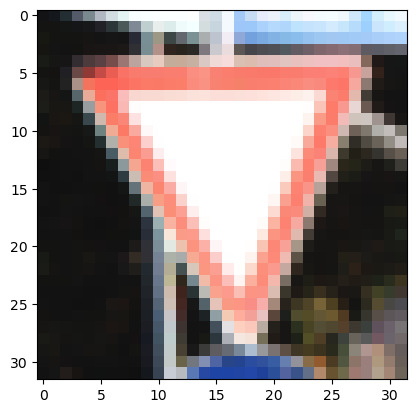

In [15]:
#Verify the correct loading and formatting of image data and labels
i = np.random.randint(1, len(x_train))  # Generate a random integer 'i' between 1 and the length of x_train.
plt.imshow(x_train[i])  # Use matplotlib's imshow function to display the image at index 'i' in the x_train dataset.
y_train[i]  # Retrieve and display the label corresponding to the image at index 'i' from y_train.

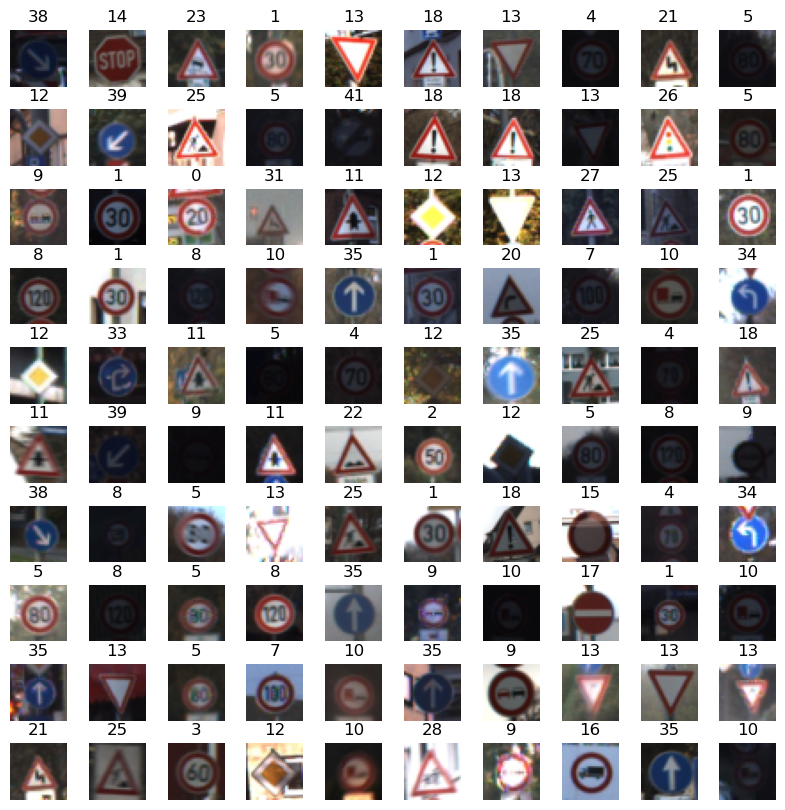

In [18]:
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# Create a figure and a set of subplots
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

# Flatten the array of axes objects
axes = axes.ravel() 

# Get the number of images in the training dataset
n_training = len(x_train)

# Loop through the grid and populate with images
for i in np.arange(0, W_grid * L_grid):#from 0 to 100  
    index = np.random.randint(0, n_training)  # Random index from training set
    axes[i].imshow(x_train[index])  # Display an image at the chosen index
    axes[i].set_title(y_train[index], fontsize=12)  # Set the title of the subplot
    axes[i].axis('off')  # Turn off the axes (disables the axes around each image to make the display cleaner)

# Adjust subplot parameters
plt.subplots_adjust(hspace=0.4)


In [19]:
# Import the shuffle function from scikit-learn to randomly shuffle the training dataset
from sklearn.utils import shuffle

# Shuffle the training data and corresponding labels to prevent the model from learning any possible order bias
x_train, y_train = shuffle(x_train, y_train)

In [20]:
# Convert RGB images to grayscale by averaging the three color channels and keeping the same array structure
x_train_gray = np.sum(x_train / 3, axis=3, keepdims=True) # Convert training set images
x_valid_gray = np.sum(x_valid / 3, axis=3, keepdims=True) # Convert validation set images
x_test_gray = np.sum(x_test / 3, axis=3, keepdims=True)   # Convert test set images

In [21]:
x_train_gray.shape # (34799, 32, 32, 1)
x_valid_gray.shape # (4410, 32, 32, 1)
x_test_gray.shape  # (12630, 32, 32, 1)

(12630, 32, 32, 1)

In [22]:
# Normalize the grayscale training images to a range of [-1, 1] by subtracting 128 and dividing by 128
x_train_gray_norm = (x_train_gray - 128) / 128
# Normalize the grayscale validation images to a range of [-1, 1]
x_valid_gray_norm = (x_valid_gray - 128) / 128
# Normalize the grayscale testing images to a range of [-1, 1]
x_test_gray_norm = (x_test_gray - 128) / 128

In [23]:
x_train_gray_norm

array([[[[-0.14322917],
         [-0.18229167],
         [-0.3046875 ],
         ...,
         [-0.0859375 ],
         [-0.44010417],
         [-0.12239583]],

        [[-0.0703125 ],
         [-0.3671875 ],
         [-0.25520833],
         ...,
         [-0.42708333],
         [-0.53385417],
         [-0.6015625 ]],

        [[ 0.3046875 ],
         [-0.19791667],
         [ 0.12239583],
         ...,
         [-0.453125  ],
         [-0.49479167],
         [-0.5703125 ]],

        ...,

        [[-0.15625   ],
         [ 0.19270833],
         [ 0.8125    ],
         ...,
         [-0.46875   ],
         [-0.40364583],
         [ 0.27604167]],

        [[ 0.046875  ],
         [ 0.0234375 ],
         [ 0.765625  ],
         ...,
         [-0.63802083],
         [-0.56770833],
         [-0.02604167]],

        [[ 0.2109375 ],
         [-0.2109375 ],
         [ 0.34895833],
         ...,
         [-0.71614583],
         [-0.65364583],
         [-0.54166667]]],


       [[[ 0.98958333],


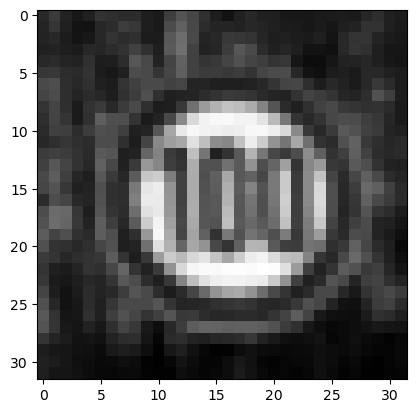

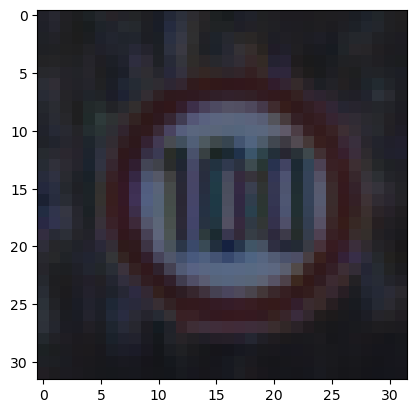

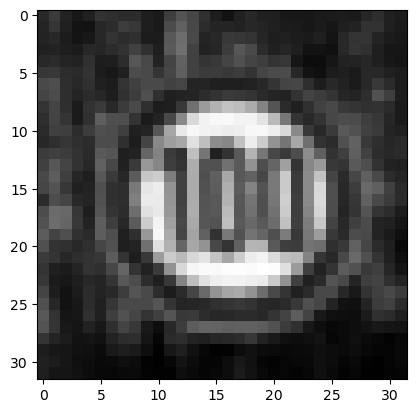

In [24]:
# Randomly selects an index from the training dataset
i = random.randint(1, len(x_train_gray))

# Displays the grayscale version of the selected image before normalization
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()  # Starts a new figure for the next plot

# Displays the original RGB version of the same selected image
plt.imshow(x_train[i])
plt.figure()  # Starts a new figure for the next plot

# Displays the grayscale version of the selected image after normalization
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')

In [25]:
# Import necessary modules from TensorFlow and Keras
from tensorflow.keras import datasets, layers, models

# Initialize a Sequential model. This type of model allows us to stack layers in a linear stack.
CNN = models.Sequential()

# Add a 2D Convolutional layer with 6 filters, each with a kernel size of 5x5, using ReLU as the activation function.
# It is defined to take input images of shape (32, 32, 1), which are 32x32 pixels with 1 color channel (grayscale).
CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))

# Add a Dropout layer to reduce overfitting by randomly setting 20% of the input units to 0 at each update during training time.
CNN.add(layers.Dropout(0.2))

# Add another 2D Convolutional layer with 16 filters, each with a kernel size of 5x5, using ReLU as the activation function.
CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))

# Add an Average Pooling layer that takes the average over a 2x2 pooling window to reduce the spatial dimensions of the output from the previous layer.
CNN.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D to feed it into the fully connected layers.
CNN.add(layers.Flatten())

# Add a fully connected (Dense) layer with 120 units and ReLU activation function to learn non-linear combinations of the high-level features extracted by convolutional layers.
CNN.add(layers.Dense(120, activation='relu'))

# Add another Dense layer with 84 units, also using the ReLU activation function.
CNN.add(layers.Dense(84, activation='relu'))

# Add a final Dense layer with 43 units and a softmax activation function.
# This layer outputs probabilities for each of the 43 classes (traffic signs).
CNN.add(layers.Dense(43, activation='softmax'))

# Print the summary of the model to see the architecture including the total number of parameters, the shape of outputs from each layer, etc.
CNN.summary()


C:\Users\96653\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       276,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         3,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,991 (1.12 MB)

 Trainable params: 292,991 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the CNN model with specific settings for the optimization algorithm, loss function, and metrics to evaluate during training.
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Fit the CNN model to the training data
history = CNN.fit(x_train_gray_norm,
                  y_train,
                  batch_size=500,   # Number of samples per gradient update
                  epochs=50,        # Number of iterations over the entire dataset
                  verbose=1,        # Show detailed information during training
                  validation_data=(x_valid_gray_norm, y_valid))  # Data on which to evaluate the loss and any model metrics at the end of each epoch


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.1914 - loss: 3.1554 - val_accuracy: 0.5481 - val_loss: 1.6754
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6821 - loss: 1.1384 - val_accuracy: 0.7583 - val_loss: 0.8672
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8591 - loss: 0.5316 - val_accuracy: 0.8104 - val_loss: 0.6891
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9135 - loss: 0.3366 - val_accuracy: 0.8467 - val_loss: 0.5850
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9390 - loss: 0.2565 - val_accuracy: 0.8689 - val_loss: 0.5106
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9550 - loss: 0.1878 - val_accuracy: 0.8778 - val_loss: 0.4587
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9616 - loss: 0.1560 - val_accuracy: 0.8717 - val_loss: 0.4909
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9684 - loss: 0.1299 - val_accuracy: 0.8907 - v

In [34]:
# Evaluate the CNN model on the normalized test dataset
score = CNN.evaluate(x_test_gray_norm, y_test)

# Print the accuracy of the model on the test data
print('Test Accuracy: {}'.format(score[1]))


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9179 - loss: 0.8156
Test Accuracy: 0.9148060083389282


In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
# Access the 'accuracy' from the training history dictionary.
# This array contains the accuracy values recorded at the end of each epoch during the training on the training dataset.
accuracy = history.history['accuracy']

# Access the 'val_accuracy' from the training history dictionary.
# This array contains the accuracy values recorded at the end of each epoch on the validation dataset.
# It is useful for evaluating how well the model is generalizing to new data that was not seen during training.
val_accuracy = history.history['val_accuracy']

# Access the 'loss' from the training history dictionary.
# This array contains the loss values recorded at the end of each epoch during the training.
# Loss is a numerical indication of how bad the model's prediction was on average across all instances.
loss = history.history['loss']

# Access the 'val_loss' from the training history dictionary.
# This array contains the loss values recorded at the end of each epoch on the validation dataset.
# Monitoring this helps in detecting overfitting: if the training loss decreases but the validation loss does not decrease correspondingly.
val_loss = history.history['val_loss']


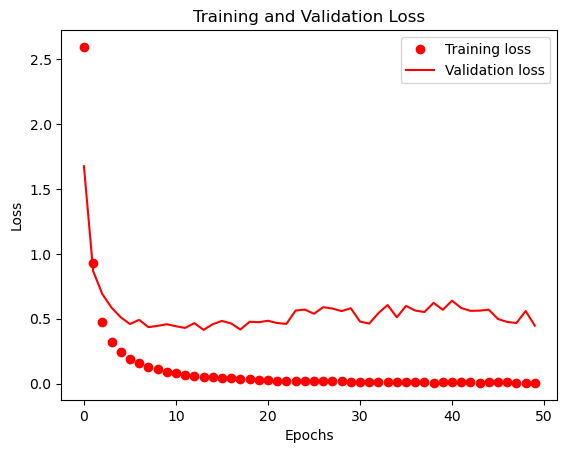

In [37]:
# Generate an array of epoch indices from 0 to the number of epochs completed, useful for plotting on the x-axis.
epocns = range(len(accuracy))

# Plot training loss values over epochs. 'ro' signifies red color with circle markers.
plt.plot(epocns, loss, 'ro', label='Training loss')

# Plot validation loss values over epochs. 'r' signifies red color with a solid line.
plt.plot(epocns, val_loss, 'r', label='Validation loss')

# Set the title of the plot to indicate what the graph represents.
plt.title('Training and Validation Loss')

# Display a legend to help differentiate between training and validation loss.
plt.legend()

# Label the x-axis as 'Epochs'.
plt.xlabel('Epochs')

# Label the y-axis as 'Loss'.
plt.ylabel('Loss')

# Display the plot. This command is necessary to show the graph when using plotting libraries like matplotlib in certain environments.
plt.show()


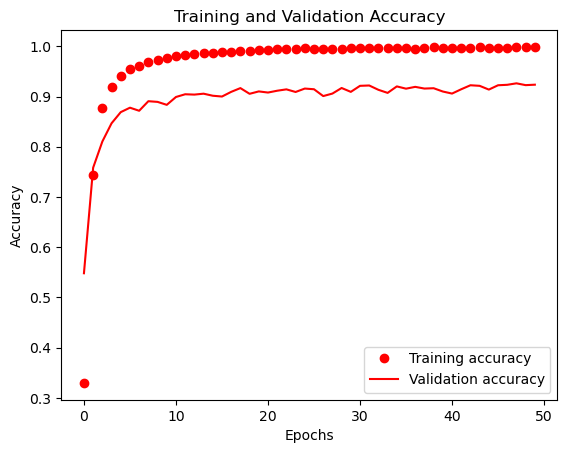

In [38]:
# Create a range of epochs based on the length of the accuracy array to use as the x-axis in the plot.
epocns = range(len(accuracy))

# Plot the training accuracy over each epoch using red circles. Label this plot as 'Training accuracy'.
plt.plot(epocns, accuracy, 'ro', label='Training accuracy')

# Plot the validation accuracy over each epoch using a red line. Label this plot as 'Validation accuracy'.
plt.plot(epocns, val_accuracy, 'r', label='Validation accuracy')

# Set the title of the plot to reflect its contents accurately. Correct the typo in the title.
plt.title('Training and Validation Accuracy')

# Add a legend to the plot to help distinguish between the training and validation lines.
plt.legend()

# Label the x-axis as 'Epochs' to indicate the unit of the time series data.
plt.xlabel('Epochs')

# Label the y-axis as 'Accuracy' to indicate what metric is being measured.
plt.ylabel('Accuracy')

# Display the plot. This is necessary in scripts or non-interactive environments.
plt.show()


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


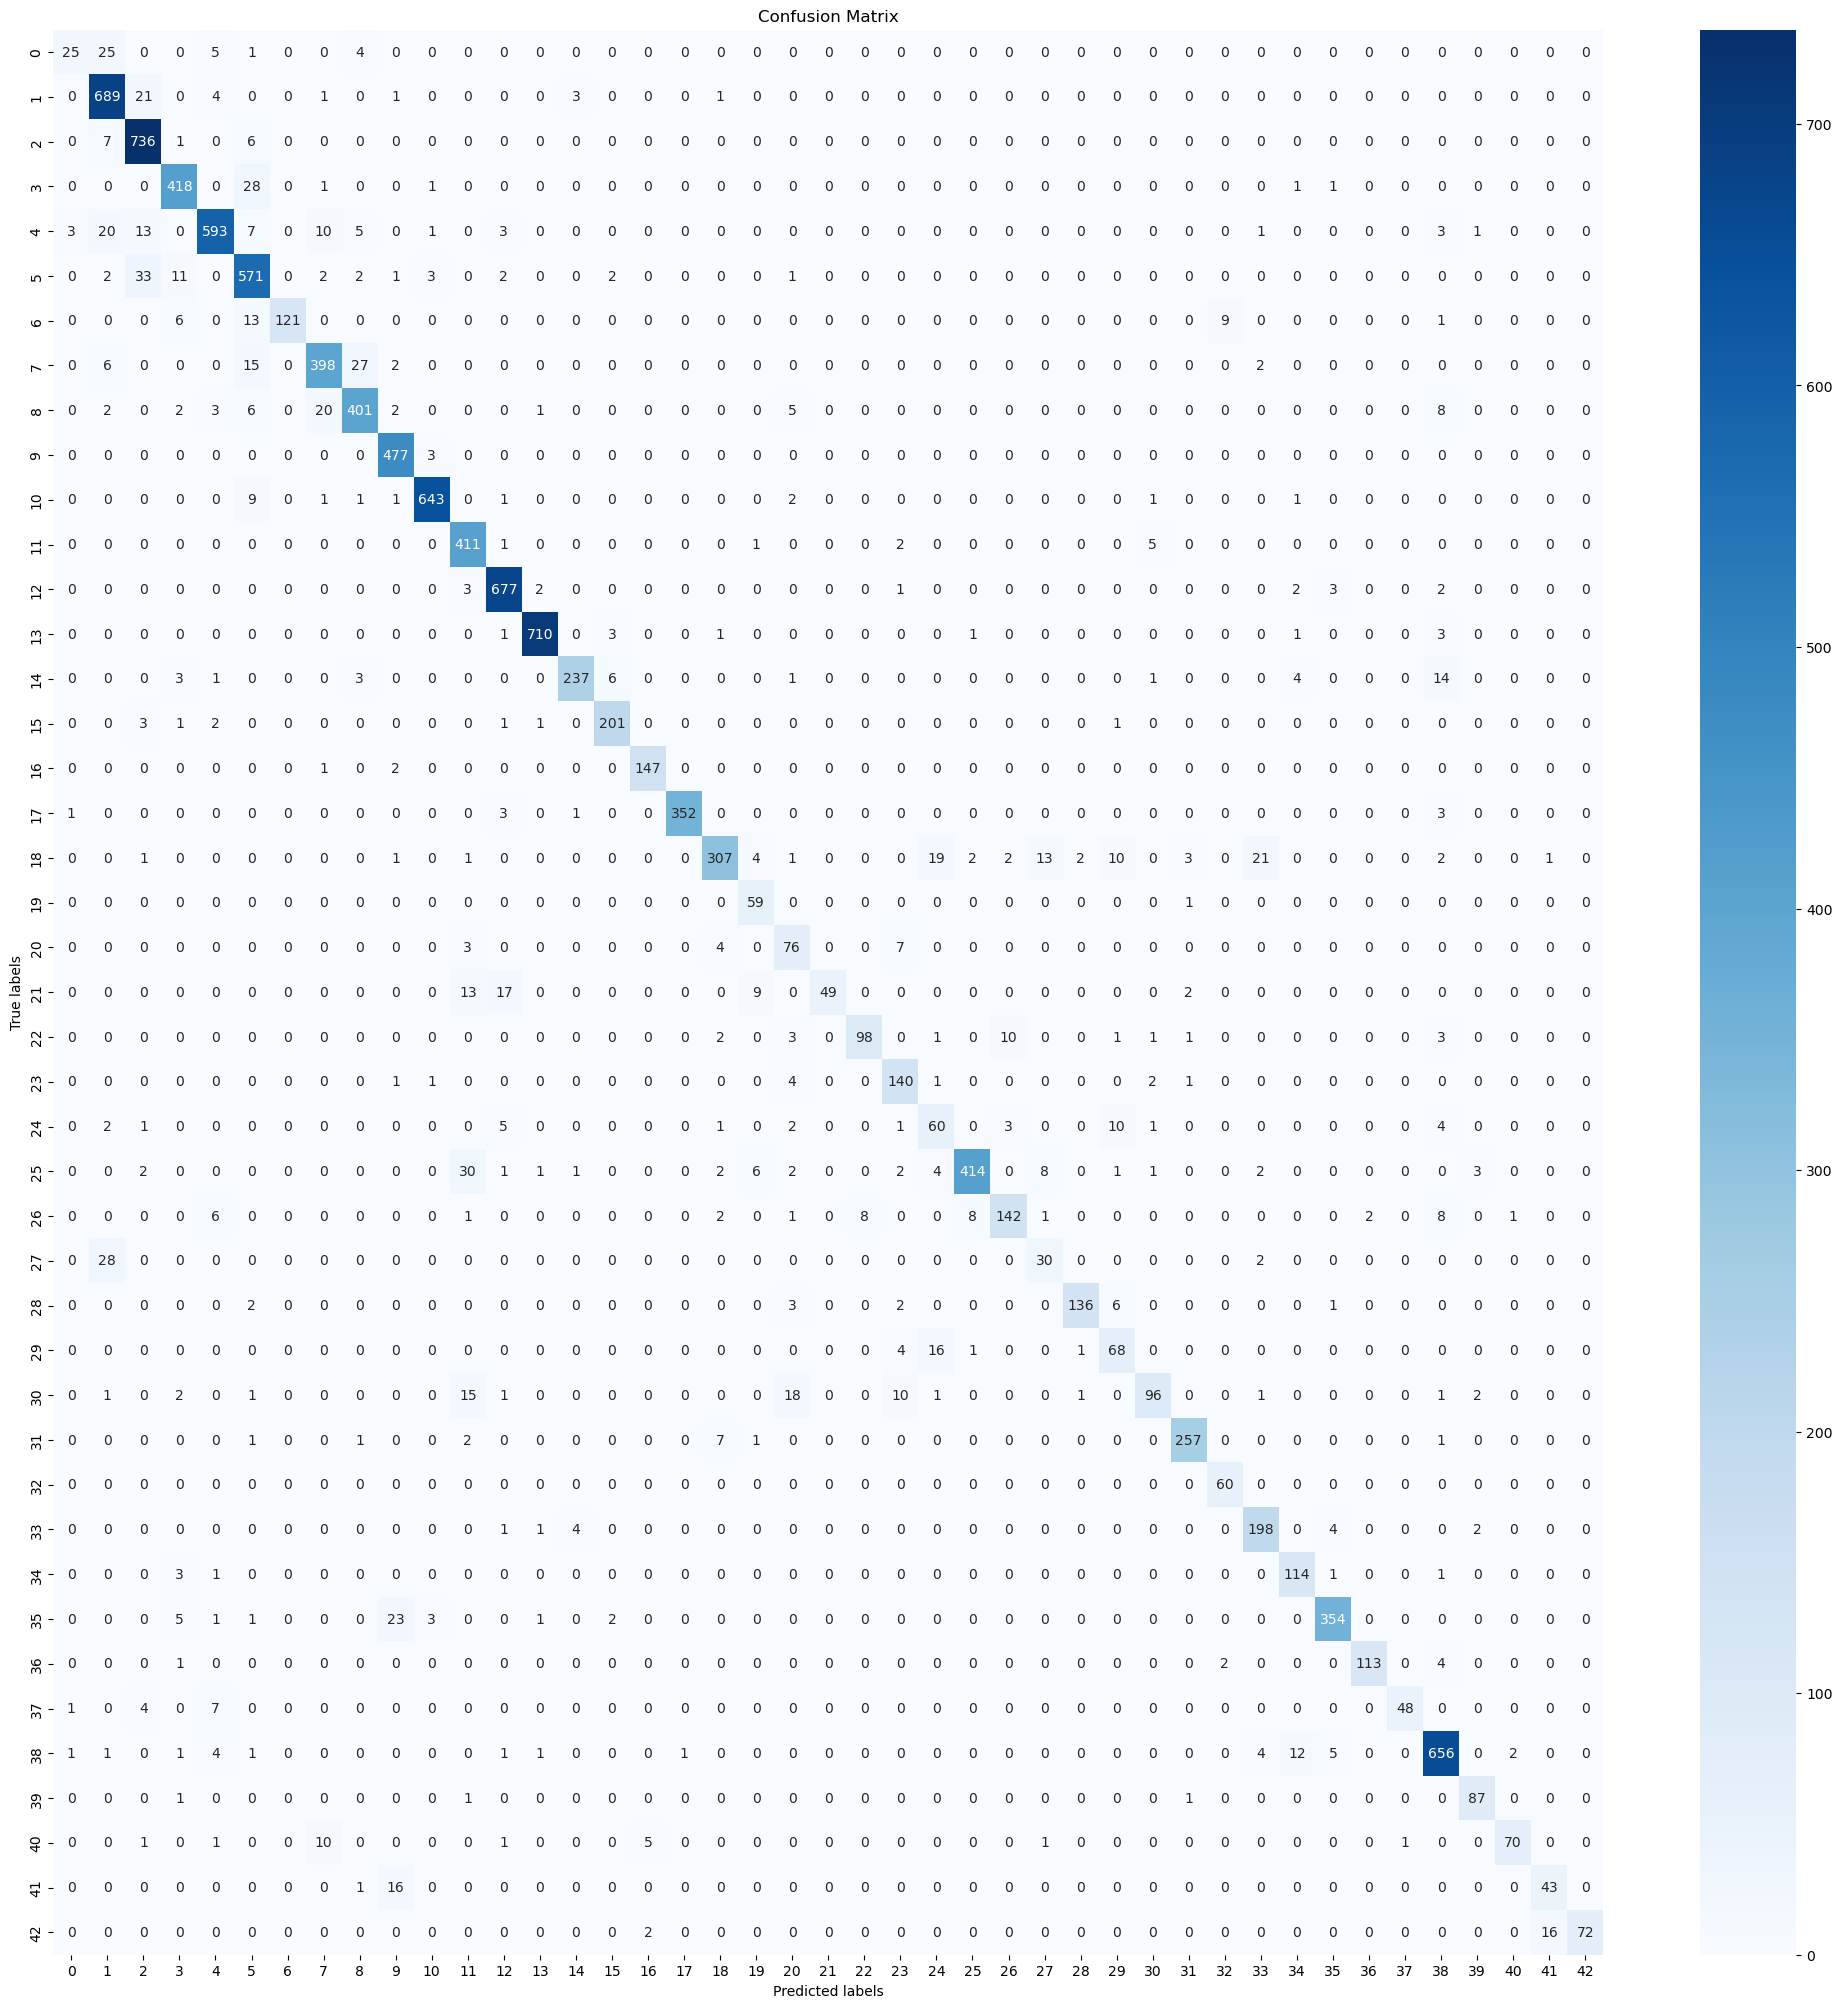

In [39]:
# Predict class probabilities for each image in the normalized grayscale test dataset using the trained CNN model.
predicted_probabilities = CNN.predict(x_test_gray_norm)

# Convert the probabilities to class labels by selecting the class with the highest probability for each image.
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# The true class labels for the test dataset.
y_true = y_test

# Import the confusion matrix function from sklearn to evaluate classification accuracy.
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix using the true labels and predicted labels.
cm = confusion_matrix(y_true, predicted_classes)

# Create a new figure with specified figure size for better visibility.
plt.figure(figsize=(25, 25))

# Use seaborn's heatmap function to plot the confusion matrix.
# 'annot = True' annotates the heatmap with matrix number values.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Adding a title to the heatmap for clarity.
plt.title('Confusion Matrix')

# Label the x-axis as 'Predicted labels'.
plt.xlabel('Predicted labels')

# Label the y-axis as 'True labels'.
plt.ylabel('True labels')

# Display the plot. This is necessary to render the plot.
plt.show()


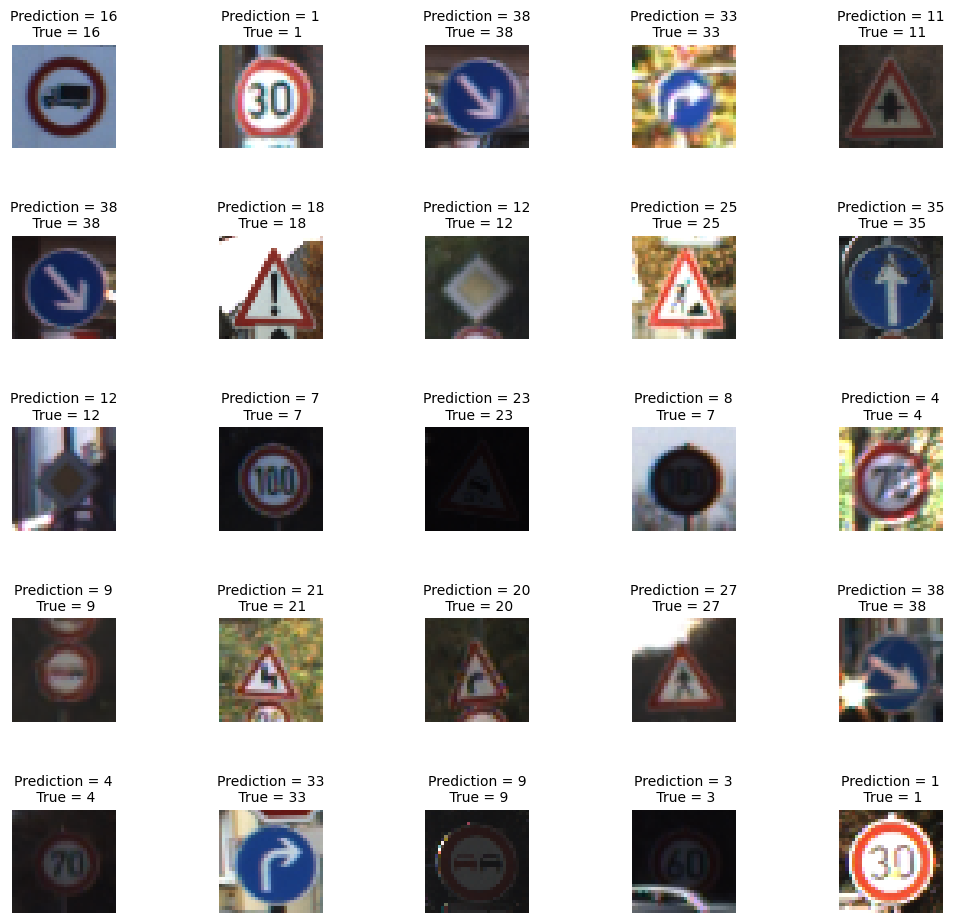

In [40]:
# Set the dimensions for the grid of images
L = 5  # Number of rows in the grid
W = 5  # Number of columns in the grid

# Create a figure and a set of subplots with the specified number of rows (L) and columns (W)
# 'figsize' sets the size of the overall figure
fig, axes = plt.subplots(L, W, figsize=(12, 12))

# Flatten the array of axes into a 1D array to allow easy iteration
axes = axes.ravel()

# Iterate through the grid and plot the images along with their predicted and true labels
for i in np.arange(0, L * W):  # np.arange creates an array with elements from 0 to L*W-1
    axes[i].imshow(x_test[i])  # Display the i-th test image
    # Set the title of each subplot with the predicted and true labels
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]), fontsize=10)
    axes[i].axis('off')  # Turn off the axis to make the image cleaner

# Adjust the space between the plots to prevent overlap
plt.subplots_adjust(wspace=1) 

# Show the plot
plt.show()
